In [1]:

# Load the python libraries for dataprocessing and model and visualization
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
# Load the entire dataset into a pandas dataframe

final_df = pd.read_csv("/nobackup/amimalik/bits-proj/dataset/dimensions/prepared_dataset.csv")

create a k datasets with m failures in each cycles
k = 5
m = [1, 3, 5, 7, 9] number of failures in each cycle

In [3]:
m = [3, 5, 7, 9]

Code below will create the 5 datasets with m values of failures

In [4]:
failures = []
fails = final_df[final_df['failure'] == 1].index.values
for i in m:
    failure = list(range(0, len(final_df), 1)) 
    f = 0
    while f < len(failure):
        if f+i-1 in fails:
            
            for values in range(f,f+i,1):
                failure[values] = 1
                
            f=f+i
        else:
            failure[f] = 0
            f=f+1
        
    failures.append(failure)

In [5]:
dfs = []
for i in range(0, 5, 1):
    if i == 0:
        dfs.append(final_df)
    else:
        aux_df = final_df.copy()
        aux_df['failure'] = failures[i-1]
        dfs.append(aux_df)

In [6]:
dfs[1].tail()

,date,serial_number,failure,Read_Error_Rate,Start_Stop_Count,Reallocated_Sectors_Count,Seek_Error_Rate,Power-On_Hours,Reported_Uncorrectable_Errors,Command_Timeout,Temperature_Difference,Power-off_Retract_Count,Load_Unload_Cycle,Current_Pending_Sector_Count,UltraDMA_CRC_Error_Count,Head_Flying_Hours
5509,2024-01-23,ZL009B2Q,0,0.755287,0.0,0.0,0.000203,0.025455,0.0,0.023256,0.451613,0.0,0.004599,0.0,0.0,0.025471
5510,2024-01-24,ZL009B2Q,0,0.025891,0.0,0.0,0.000208,0.026248,0.0,0.023256,0.419355,0.0,0.004779,0.0,0.0,0.026268
5511,2024-01-25,ZL009B2Q,1,0.409337,0.0,0.0,0.000210,0.027066,0.0,0.023256,0.451613,0.0,0.004869,0.0,0.0,0.027092
5512,2024-01-26,ZL009B2Q,1,0.409337,0.0,0.0,0.000210,0.027066,0.0,0.023256,0.451613,0.0,0.004869,0.0,0.0,0.027092
5513,2024-01-27,ZL009B2Q,1,0.409337,0.0,0.0,0.000210,0.027066,0.0,0.023256,0.451613,0.0,0.004869,0.0,0.0,0.027092


In [7]:
# Drop the columns like data and serial_numbers
for df in dfs:
    df.drop(['date', 'serial_number'], axis=1, inplace=True)
    column_means = df.mean()
    df = df.fillna(column_means)
    df.describe()

In [8]:
dfs[1].head()

,failure,Read_Error_Rate,Start_Stop_Count,Reallocated_Sectors_Count,Seek_Error_Rate,Power-On_Hours,Reported_Uncorrectable_Errors,Command_Timeout,Temperature_Difference,Power-off_Retract_Count,Load_Unload_Cycle,Current_Pending_Sector_Count,UltraDMA_CRC_Error_Count,Head_Flying_Hours
0,0,0.623688,0.003186,0.0,0.000616,0.938627,0.0,0.0,0.483871,0.534639,0.194409,0.0,0.0,0.935705
1,0,0.217878,0.003186,0.0,0.000624,0.939420,0.0,0.0,0.516129,0.536145,0.194590,0.0,0.0,0.936503
2,0,0.051171,0.003186,0.0,0.000629,0.939804,0.0,0.0,0.516129,0.536145,0.194590,0.0,0.0,0.936915
3,0,0.047147,0.003186,0.0,0.000639,0.940623,0.0,0.0,0.451613,0.536145,0.194860,0.0,0.0,0.937712
4,0,0.048253,0.003186,0.0,0.000648,0.941006,0.0,0.0,0.419355,0.536145,0.194860,0.0,0.0,0.938124


In [9]:
df.describe()

,failure,Read_Error_Rate,Start_Stop_Count,Reallocated_Sectors_Count,Seek_Error_Rate,Power-On_Hours,Reported_Uncorrectable_Errors,Command_Timeout,Temperature_Difference,Power-off_Retract_Count,Load_Unload_Cycle,Current_Pending_Sector_Count,UltraDMA_CRC_Error_Count,Head_Flying_Hours
count,5514.000000,5514.000000,5514.000000,5514.000000,5.514000e+03,5514.000000,5514.000000,5514.000000,5514.000000,5514.000000,5514.000000,5514.000000,5514.000000,5514.000000
mean,0.182807,0.499075,0.007699,0.031106,1.261210e-02,0.858918,0.009855,0.020241,0.485784,0.128583,0.343724,0.000936,0.011607,0.851608
std,0.386544,0.290053,0.042589,0.094143,7.455378e-02,0.141043,0.096624,0.062296,0.178922,0.238101,0.303820,0.015811,0.107118,0.124214
min,0.000000,0.000000,0.000000,0.000000,9.223936e-08,0.000102,0.000000,0.000000,0.000000,0.000000,0.001894,0.000000,0.000000,0.012015
25%,0.000000,0.249789,0.002655,0.000000,5.868060e-04,0.836226,0.000000,0.000000,0.354839,0.001506,0.155906,0.000000,0.000000,0.832690
50%,0.000000,0.501346,0.005311,0.000000,1.242880e-03,0.894958,0.000031,0.000000,0.483871,0.004518,0.204509,0.000000,0.000000,0.868465
75%,0.000000,0.752333,0.006904,0.004724,2.133585e-03,0.934246,0.000351,0.000002,0.645161,0.009036,0.291659,0.000000,0.000000,0.914448
max,1.000000,1.000000,1.000000,1.000000,9.554373e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


we will be using  Gradient Boosting method to train in each dataset. 
will be using GridSearch to find the optimum parameters for each dataset.

In [10]:
models = []
accs = [] #accuracies
recs = [] #recalls
precs = [] #precisions
f1s = [] #f1 scores
rocs = [] #roc auc scores

for df in dfs:
    
    X = df.drop('failure', axis=1)
    y = df.failure
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    
    gbrt = GradientBoostingClassifier(max_features='sqrt', random_state=0)
    learning_rates = [0.1, 0.05, 0.01]
    n_estimators = [16, 32, 64]
    max_depths = [5, 10, 15]
    
    params = {'learning_rate': learning_rates, 'n_estimators':n_estimators, 'max_depth':max_depths}
    clf = GridSearchCV(gbrt, params)
    clf.fit(X_train, y_train)
    models.append(clf)
    
    final_pred = clf.predict(X_test)
    accs.append(accuracy_score(y_test, final_pred))
    recs.append(recall_score(y_test, final_pred))
    precs.append(precision_score(y_test, final_pred))
    f1s.append(f1_score(y_test, final_pred))
    rocs.append(roc_auc_score(y_test, final_pred))
    print(clf.best_params_)

/ws/amimalik-bgl/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 16}
{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 64}
{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 64}
{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 64}
{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 64}


# Evaluation

Accuracy, Recall, Precision, F1-Score, AUC-ROC values for the k dataset 

Text(0.5, 1.0, 'Accuracy values of each model')

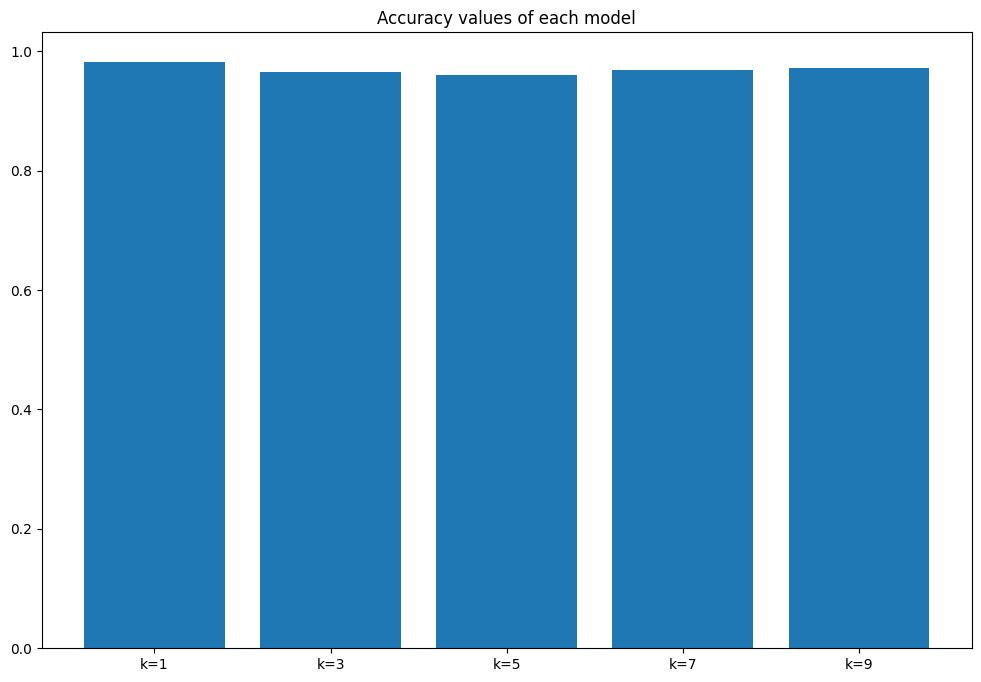

In [11]:
x = ['k=1', 'k=3', 'k=5', 'k=7', 'k=9']

plt.figure(figsize=(12,8))
plt.bar(x, accs)
plt.title('Accuracy values of each model')

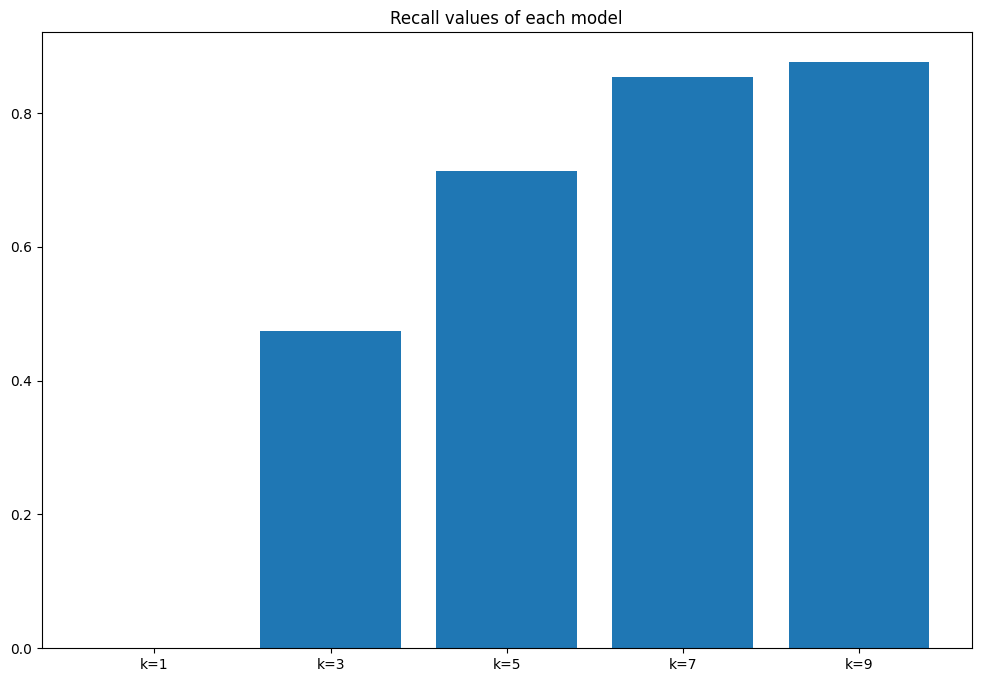

In [12]:
plt.figure(figsize=(12,8))
plt.bar(x, recs)
plt.title('Recall values of each model')
plt.show()

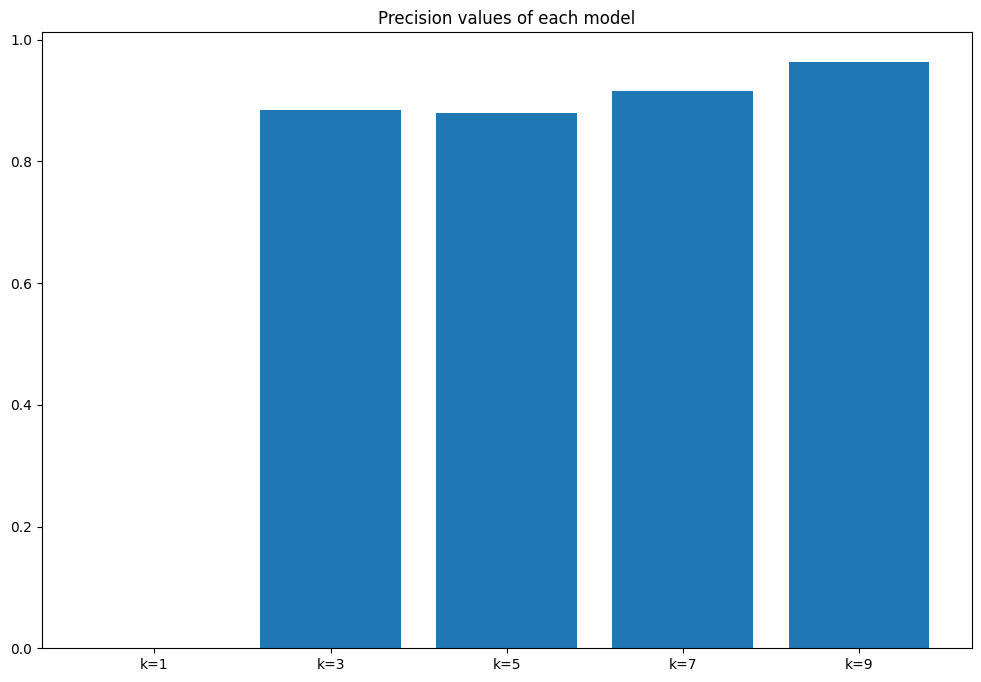

In [13]:
plt.figure(figsize=(12,8))
plt.bar(x, precs)
plt.title('Precision values of each model')
plt.show()

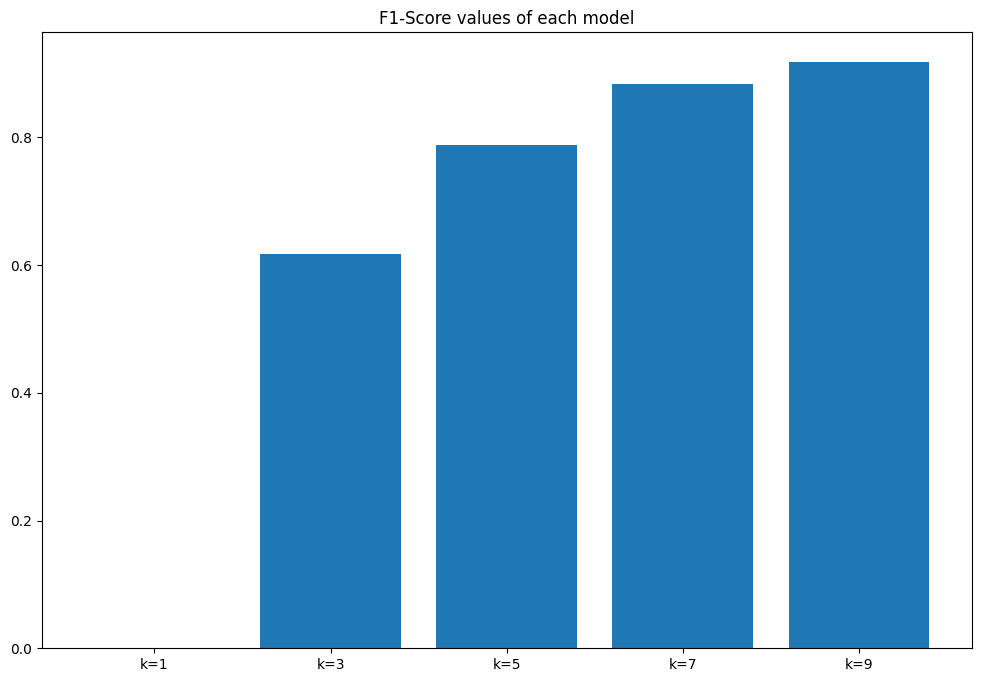

In [14]:
plt.figure(figsize=(12,8))
plt.bar(x, f1s)
plt.title('F1-Score values of each model')
plt.show()

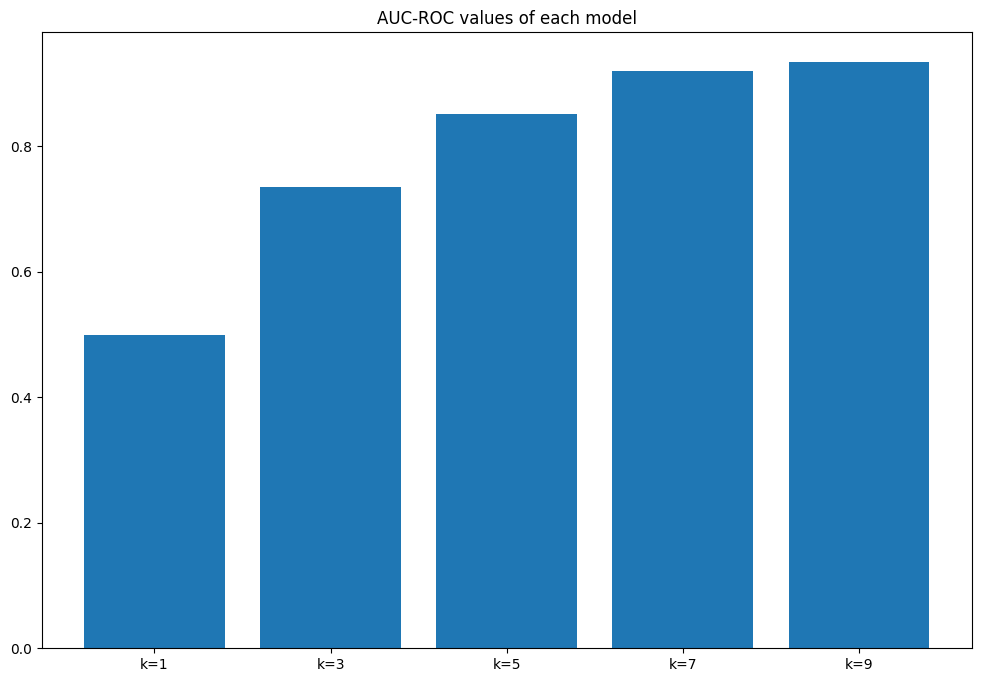

In [15]:
plt.figure(figsize=(12,8))
plt.bar(x, rocs)
plt.title('AUC-ROC values of each model')
plt.show()